# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù

## K-means, GMM, Spectral, HDBSCAN ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö©

## XAI Ìï¥ÏÑù (SHAP, LIME, Permutation Importance Ï†ÅÏö©)

### ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

In [39]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# macOSÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# ÎßàÏù¥ÎÑàÏä§(-)Í∞Ä Íπ®Ïßà Ïàò ÏûàÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï®
plt.rcParams['axes.unicode_minus'] = False


### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [41]:
# Ï†àÎåÄÍ≤ΩÎ°úÎ°ú Î∂àÎü¨Ïò¥
df = pd.read_csv("/Users/sungsupark/Desktop/2025-1 ·Ñâ·ÖÆ·Ñã·Ö•·Ü∏·Ñå·Ö°·ÑÖ·Ö≠/·Ñâ·Ö©·Ñë·Ö≥·Ñê·Ö≥·Ñã·Ö∞·Ñã·Ö•·Ñã·Ö≤·Üº·Ñí·Ö°·Ü∏·Ñè·Ö¢·Ü∏·Ñâ·Ö≥·Ñê·Ö©·Ü´·ÑÉ·Öµ·Ñå·Ö°·Ñã·Öµ·Ü´/financial_data_processing_cospi200.csv")

# Í∏∞ÏóÖÎ™ÖÏùÑ Îî∞Î°ú Ï†ÄÏû•Ìïú ÌõÑ, featureÎßå Îî∞Î°ú Î∂ÑÎ¶¨Ìï®
company = df['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π']
X_raw = df.drop(columns=["Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π"])

X_raw

Îß§Ï∂úÏï°      ÏòÅÏóÖÏù¥Ïùµ    ÎãπÍ∏∞ÏàúÏù¥Ïùµ        ÏûêÏÇ∞Ï¥ùÍ≥Ñ       ÏûêÎ≥∏Ï¥ùÍ≥Ñ       ÏûêÎ≥∏Í∏à  ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ  \
0     78168.10   2353.90  1806.20    30413.75   10074.50    173.00   6499.40   
1     82983.75   9329.10  7427.55  1402323.10  106667.95  16297.00   1059.20   
2    399896.75  21261.65  4553.45   459940.30  173529.85   1790.00  43187.50   
3    117828.20   4457.35  2185.80    95146.65   40917.65   1141.00   6244.35   
4    284474.55  14863.60  6214.55   290387.75  115612.75    819.00  20663.90   
..         ...       ...      ...         ...        ...       ...       ...   
194  168437.95  10420.80  7558.30   476717.70   60701.60    447.00  14037.90   
195   39464.80    361.90  -312.55    31713.35    7943.10   2000.00   1265.10   
196   40082.75   2242.65  1152.10    49684.20   13957.55    466.00   2791.35   
197   77966.55   3994.95  2516.70    42602.50   15773.25    216.00   5586.25   
198    4676.15    156.70  -186.75     7944.55    3327.90    488.95    566.60   

        Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ    ÏòÅÏóÖÏù¥ÏùµÎ•†    ÏàúÏù¥ÏùµÎ•†   ROE(%)  ROA(%)       Î∂ÄÏ±ÑÎπÑÏú®    EPS(Ïõê)  \
0      3371.05   3.0045  2.3025  19.1640  6.1845   204.4665  10452.15   
1    194600.65  12.1160  9.5230   7.2460  0.5505  1212.4140   2177.75   
2    182317.25   5.2905  1.1735   3.2850  1.0215   164.8735   4743.30   
3     33233.10   3.7705  1.8440   5.1870  2.3095   132.5530   8222.50   
4    110318.45   5.2365  2.2195   6.7945  2.2100   151.2490  25676.20   
..         ...      ...     ...      ...     ...        ...       ...   
194   16655.60   6.3260  4.5935  12.1730  1.5880   746.7925   8454.75   
195   16232.85   0.8090 -0.8505  -3.0005 -0.9120   336.9375   -781.90   
196   12929.00   5.2690  2.6040   8.2110  2.2965   269.5100  11180.00   
197   13711.75   5.0295  3.1635  18.9360  6.5965   177.7275  45108.25   
198    3455.90   2.9870 -4.7315  -2.2640 -1.5755   138.4710    -89.50   

        PER(Î∞∞)     BPS(Ïõê)  PBR(Î∞∞)   Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  
0    13.842000   58318.90  2.5360   17283906.0  
1     3.688000   31087.35  0.2545  323323988.3  
2    23.256000  157376.10  0.5830   29176998.0  
3    18.852000  183922.25  0.6120   22812344.0  
4    16.468500  433280.45  0.7875   15054186.0  
..         ...        ...     ...          ...  
194   3.715000   77333.60  0.3630   89400000.0  
195   3.286643   20980.10  3.7785   39248121.0  
196  21.237749  135929.25  1.2290    9324548.0  
197  33.786000  295216.55  1.1600    4327682.0  
198  19.894726    3090.65  3.7555   99840836.4  

[199 rows x 18 columns]

### featurer scaling ÏàòÌñâ

In [42]:
# StandardScalerÎ°ú Ï†ïÍ∑úÌôîÌïúÎã§.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
# X_scaled Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
X_scaled_df = pd.DataFrame(X_scaled, columns=X_raw.columns)

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
X_scaled_df.to_csv("X_scaled.csv", index=False, encoding="utf-8-sig")

print("X_scaled Îç∞Ïù¥ÌÑ∞Í∞Ä 'X_scaled.csv'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

X_scaled Îç∞Ïù¥ÌÑ∞Í∞Ä 'X_scaled.csv'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö© Î∞è ÌèâÍ∞Ä Ìï®Ïàò Ï†ïÏùò

In [43]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏÑ±Îä• ÌèâÍ∞Ä Ìï®ÏàòÎ•º Ï†ïÏùòÌï® 
# Silhouette ScoreÎ•º ÏÇ¨Ïö©Ìï®
def evaluate_clustering(model, X, labels=None):
    if (labels is None):
        labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

### ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞

In [44]:
# ÌõÑÎ≥¥ K Í∞í Î≤îÏúÑ ÏÑ§Ï†ï
k_values = range(2, 50)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
sse_list = [] # ElbowÍ∞Ä Í∫ΩÏù¥Îäî ÏßÄÏ†ê ÌôïÏù∏Ïö©
silhouette_scores = [] # Ïã§Î£®Ïó£ Ï†êÏàòÍ∞Ä ÏµúÎåÄÏù∏ ÏßÄÏ†ê ÌôïÏù∏Ïö©
ch_scores = [] # Calinski-Harabasz Ï†êÏàòÍ∞Ä ÏµúÎåÄÏù∏ ÏßÄÏ†ê ÌôïÏù∏Ïö©

gmm_silhouette_scores = []
gmm_ch_scores = []

spectral_silhouette_scores = []
spectral_ch_scores = []

# Í∞Å KÏóê ÎåÄÌï¥ KMeans, GMM, Spectral ÌèâÍ∞Ä
for k in k_values:
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    sse_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans_labels))
    
    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    gmm_silhouette_scores.append(silhouette_score(X_scaled, gmm_labels))
    gmm_ch_scores.append(calinski_harabasz_score(X_scaled, gmm_labels))
    
    # Spectral clustering
    spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')
    spectral_labels = spectral.fit_predict(X_scaled)
    spectral_silhouette_scores.append(silhouette_score(X_scaled, spectral_labels))
    spectral_ch_scores.append(calinski_harabasz_score(X_scaled, spectral_labels))

plt.figure(figsize=(18, 12))

# SSE (K-means Ï†ÑÏö©)
plt.subplot(3, 1, 1)
plt.plot(k_values, sse_list, marker='o')
plt.xticks(k_values)  # Î™®Îì† kÍ∞íÏùÑ xÏ∂ïÏóê ÌëúÏãúÌï®
plt.title("Elbow Method (K-means)")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïàò (k)")
plt.ylabel("SSE")

# Silhouette Score
plt.subplot(3, 1, 2)
plt.plot(k_values, silhouette_scores, marker='o', label='K-means')
plt.plot(k_values, gmm_silhouette_scores, marker='s', label='GMM')
plt.plot(k_values, spectral_silhouette_scores, marker='^', label='Spectral')
plt.xticks(k_values)  # Î™®Îì† kÍ∞íÏùÑ xÏ∂ïÏóê ÌëúÏãúÌï®
plt.title("Silhouette Score by Clustering Method")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïàò (k)")
plt.ylabel("Silhouette Score")
plt.legend()

# Calinski-Harabasz Index
plt.subplot(3, 1, 3)
plt.plot(k_values, ch_scores, marker='o', label='K-means')
plt.plot(k_values, gmm_ch_scores, marker='s', label='GMM')
plt.plot(k_values, spectral_ch_scores, marker='^', label='Spectral')
plt.xticks(k_values)  # Î™®Îì† kÍ∞íÏùÑ xÏ∂ïÏóê ÌëúÏãúÌï®
plt.title("Calinski-Harabasz Index by Clustering Method")
plt.xlabel("ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïàò (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.legend()

plt.tight_layout()
plt.show()


### K-means, GMM, Sperctral Clustering Ï†ÅÏö© Î∞è ÎπÑÍµê

In [46]:
# 3Í∞ÄÏßÄ ÌèâÍ∞Ä ÏßÄÌëúÎ•º Î≥¥Í≥† kÍ∞íÏùÑ Í≤∞Ï†ïÌï®

# K-means clustering
# K-meansÎäî k=5ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels, kmeans_score = evaluate_clustering(kmeans, X_scaled)

# GMM
# GMMÏùÄ k=7ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels, gmm_score = evaluate_clustering(gmm, X_scaled, labels=gmm.fit_predict(X_scaled))

# Spectral clustering
# Spectral clusteringÏùÄ Í±∞Ïùò Î™®Îì† kÏùò Î≤îÏúÑÏóêÏÑú ÌèâÍ∞ÄÍ∞Ä ÎÇÆÍ≤å ÎÇòÏò¥
spectral = SpectralClustering(n_clusters=42, random_state=42, affinity='nearest_neighbors')
spectral_labels, spectral_score = evaluate_clustering(spectral, X_scaled)


# Davies-Bouldin Index Í≥ÑÏÇ∞
# Î≥¥ÌÜµ 0.5 ~ 1.0 ÏÇ¨Ïù¥Î©¥ Í¥úÏ∞ÆÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ÎùºÍ≥† Ìï®. Ïã§Î¨¥ÏóêÏÑú ÏûêÏ£º ÎÇòÏò§Îäî ÏàòÏ§Ä
kmeans_dbi = davies_bouldin_score(X_scaled, kmeans_labels)
gmm_dbi = davies_bouldin_score(X_scaled, gmm_labels)
spectral_dbi = davies_bouldin_score(X_scaled, spectral_labels)

# Í≤∞Í≥º ÎπÑÍµê Ï∂úÎ†•
print(f"KMeans Davies-Bouldin Index: {kmeans_dbi:.4f}")
print(f"GMM Davies-Bouldin Index: {gmm_dbi:.4f}")
print(f"Spectral Davies-Bouldin Index: {spectral_dbi:.4f}")

# # Í≤∞Í≥º ÎπÑÍµê
# print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# print(f"GMM Silhouette Score: {gmm_score:.4f}")
# print(f"Spectral Silhouette Score: {spectral_score:.4f}")


KMeans Davies-Bouldin Index: 0.8356
GMM Davies-Bouldin Index: 0.8957
Spectral Davies-Bouldin Index: 1.2179


### ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû• (K-means)

In [47]:
# K-meansÍ∞Ä 0.8356Î°ú Í∞íÏù¥ Í∞ÄÏû• ÎÇÆÍ≤å ÎÇòÏôîÎã§.
df['Cluster'] = kmeans_labels

### Random Forest ÌïôÏäµ - XAI Ìï¥ÏÑùÏö©

In [48]:
# RandomForestClassifier ÌïôÏäµ
clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimatorsÏùÄ Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏÇ¨Ïö©Ìï®
clf.fit(X_scaled, kmeans_labels)

RandomForestClassifier(random_state=42)

### SHAP Ìï¥ÏÑù

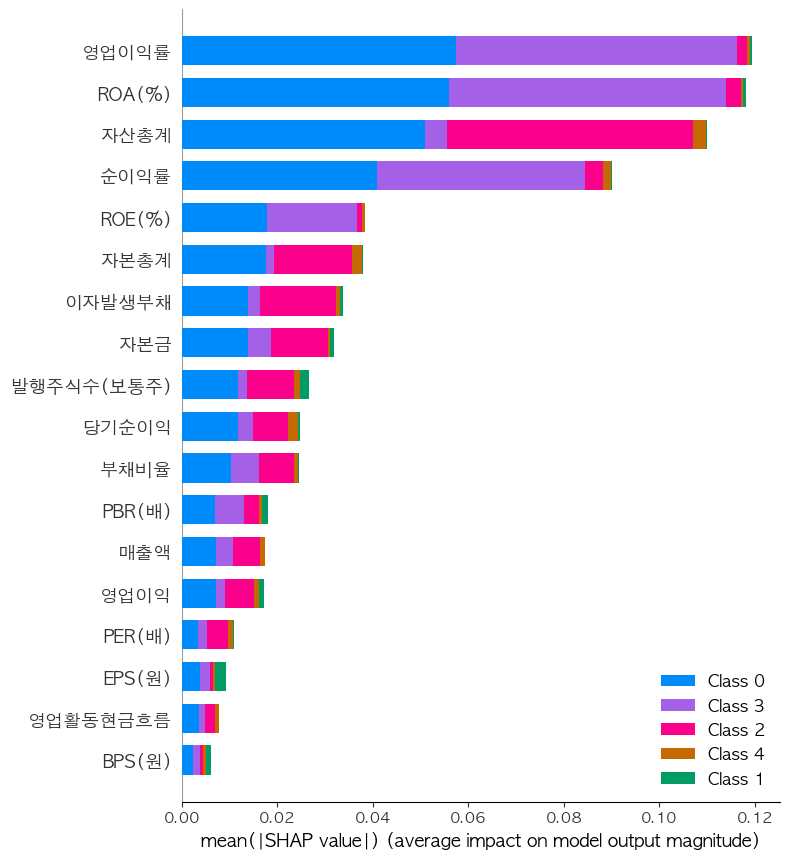

In [49]:
# SHAP Î∂ÑÏÑù
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_scaled)

# feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï®
shap.summary_plot(shap_values, X_raw, plot_type="bar")

In [50]:
# X_rawÎäî DataFrame, shap_valuesÎäî ÌÅ¥ÎûòÏä§Î≥Ñ Î¶¨Ïä§Ìä∏ Íµ¨Ï°∞ÎùºÍ≥† Í∞ÄÏ†ï
feature_names = X_raw.columns
num_classes = len(shap_values)
top_n = 5

for class_idx in range(num_classes):
    print(f"\nüü© Class {class_idx}ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Feature TOP {top_n}:\n" + "-"*50)
    
    # ÌÅ¥ÎûòÏä§Î≥Ñ SHAP Ï†àÎåìÍ∞í ÌèâÍ∑† Í≥ÑÏÇ∞
    class_shap = np.abs(shap_values[class_idx]).mean(axis=0)
    
    # Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
    top_idx = np.argsort(class_shap)[::-1][:top_n]
    
    for i in top_idx:
        print(f"{feature_names[i]}: ÌèâÍ∑† SHAP = {class_shap[i]:.4f}")


üü© Class 0ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Feature TOP 5:
--------------------------------------------------
Îß§Ï∂úÏï°: ÌèâÍ∑† SHAP = 0.0129
ÏûêÏÇ∞Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0093
ÎãπÍ∏∞ÏàúÏù¥Ïùµ: ÌèâÍ∑† SHAP = 0.0044
ÏûêÎ≥∏Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0006
ÏòÅÏóÖÏù¥Ïùµ: ÌèâÍ∑† SHAP = 0.0004

üü© Class 1ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Feature TOP 5:
--------------------------------------------------
ÎãπÍ∏∞ÏàúÏù¥Ïùµ: ÌèâÍ∑† SHAP = 0.0415
Îß§Ï∂úÏï°: ÌèâÍ∑† SHAP = 0.0392
ÏûêÏÇ∞Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0064
ÏûêÎ≥∏Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0014
ÏòÅÏóÖÏù¥Ïùµ: ÌèâÍ∑† SHAP = 0.0004

üü© Class 2ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Feature TOP 5:
--------------------------------------------------
Îß§Ï∂úÏï°: ÌèâÍ∑† SHAP = 0.0110
ÏûêÏÇ∞Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0066
ÎãπÍ∏∞ÏàúÏù¥Ïùµ: ÌèâÍ∑† SHAP = 0.0052
ÏûêÎ≥∏Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0007
ÏòÅÏóÖÏù¥Ïùµ: ÌèâÍ∑† SHAP = 0.0004

üü© Class 3ÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú Feature TOP 5:
--------------------------------------------------
Îß§Ï∂úÏï°: ÌèâÍ∑† SHAP = 0.0110
ÏûêÏÇ∞Ï¥ùÍ≥Ñ: ÌèâÍ∑† SHAP = 0.0

### ÏúÑÏóê Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Í∞Å class Î≥ÑÎ°ú Ïûò Ï£ºÏöîÌïú featureÍ∞Ä ÎÇòÏò® Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### Í∞Å clusterÏóê Ïñ¥Îñ§ Ï¢ÖÎ™©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

In [51]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞ÏóÖ Î¶¨Ïä§Ìä∏Î•º Ï∂úÎ†•ÌïúÎã§.
for cluster_id in range(kmeans.n_clusters):
    print(f"[ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:")
    stock_list = company[kmeans_labels == cluster_id].values
    print(", ".join(stock_list))


[ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
BGFÎ¶¨ÌÖåÏùº, CJ, CJÎåÄÌïúÌÜµÏö¥, CJÏ†úÏùºÏ†úÎãπ, DBÏÜêÌï¥Î≥¥Ìóò, DL, DLÏù¥Ïï§Ïî®, GKL, GS, GSÍ±¥ÏÑ§, GSÎ¶¨ÌÖåÏùº, HDÌïúÍµ≠Ï°∞ÏÑ†Ìï¥Ïñë, HDÌòÑÎåÄ, HDÌòÑÎåÄÎØ∏Ìè¨, HDÌòÑÎåÄÏù∏ÌîÑÎùºÏΩîÏñ¥, HDÌòÑÎåÄÏùºÎ†âÌä∏Î¶≠, HDÌòÑÎåÄÏ§ëÍ≥µÏóÖ, HLÎßåÎèÑ, HSÌö®ÏÑ±Ï≤®Îã®ÏÜåÏû¨, JBÍ∏àÏúµÏßÄÏ£º, KCC, KGÎ™®ÎπåÎ¶¨Ìã∞, KT, LG, LGÎîîÏä§ÌîåÎ†àÏù¥, LGÏÉùÌôúÍ±¥Í∞ï, LGÏóêÎÑàÏßÄÏÜîÎ£®ÏÖò, LGÏú†ÌîåÎü¨Ïä§, LGÏù¥ÎÖ∏ÌÖç, LGÏ†ÑÏûê, LGÌôîÌïô, LIGÎÑ•Ïä§Ïõê, LS, LS ELECTRIC, LXÏù∏ÌÑ∞ÎÇ¥ÏÖîÎÑê, NHÌà¨ÏûêÏ¶ùÍ∂å, OCI, OCIÌôÄÎî©Ïä§, PIÏ≤®Îã®ÏÜåÏû¨, POSCOÌôÄÎî©Ïä§, S-Oil, SKC, SKÎÑ§Ìä∏ÏõçÏä§, SKÏïÑÏù¥Ïù¥ÌÖåÌÅ¨ÎÜÄÎ°úÏßÄ, SKÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò, SKÏºÄÎØ∏Ïπº, SKÌÖîÎ†àÏΩ§, TCCÏä§Ìã∏, TKGÌú¥ÏºêÏä§, iMÍ∏àÏúµÏßÄÏ£º, Í∞ïÏõêÎûúÎìú, Í≥†Î†§ÏïÑÏó∞, Í∏àÌò∏ÏÑùÏú†ÌôîÌïô, Í∏àÌò∏ÌÉÄÏù¥Ïñ¥, ÎÑ∑ÎßàÎ∏î, ÎÖπÏã≠Ïûê, ÎÖπÏã≠ÏûêÌôÄÎî©Ïä§, ÎÜçÏã¨, ÎåÄÏÉÅ, ÎåÄÏö∞Í±¥ÏÑ§, ÎåÄÏõÖ, ÎåÄÏõÖÏ†úÏïΩ, ÎåÄÌïúÏú†Ìôî, ÎåÄÌïúÏ†ÑÏÑ†, ÎåÄÌïúÌï≠Í≥µ, ÎèôÏÑú, ÎèôÏõêÏãúÏä§ÌÖúÏ¶à, ÎëêÏÇ∞, ÎëêÏÇ∞Î∞•Ï∫£, ÎëêÏÇ∞ÏóêÎÑàÎπåÎ¶¨Ìã∞, ÎëêÏÇ∞Ìì®ÏñºÏÖÄ, 

### K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏóê Ï¢ÖÎ™©Î™ÖÏùÑ Ìè¨Ìï®Ìï¥ÏÑú ÏãúÍ∞ÅÌôî

In [ ]:
# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ PCAÎ°ú Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïúÎã§.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Í≤∞Í≥ºÎ•º dataFrameÏúºÎ°ú Ï†ïÎ¶¨ÌïúÎã§. 
df_clustered = pd.DataFrame({
    'Í∏∞ÏóÖÎ™Ö': company.values,
    'Cluster': kmeans_labels,
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1]
})

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['PCA1'][i]+0.01, df_clustered['PCA2'][i]+0.01, df_clustered['Í∏∞ÏóÖÎ™Ö'][i], fontsize=8)
plt.title("K-means Clustering Í≤∞Í≥º (PCA + Í∏∞ÏóÖÎ™Ö ÌëúÏãú)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()